In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import pandas as pd

In [3]:
df = pd.read_pickle("data.pkl")

print(df.shape)
df.head()


(416809, 2)


,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


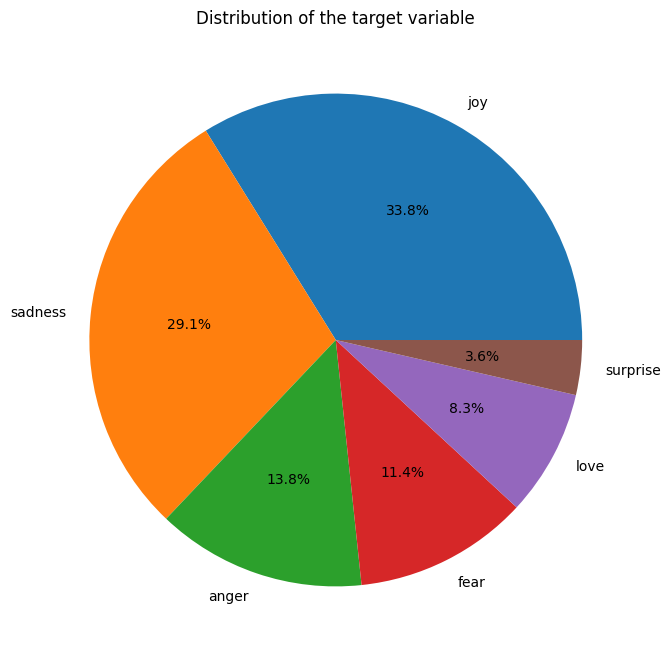

In [4]:
# Count the number of each class
class_counts = df['emotions'].value_counts()

# Create a pie chart
plt.figure(figsize=(8,8), facecolor='white')
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Distribution of the target variable')
plt.show()

In [5]:
# Create a word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(' '.join(df['text']))

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

KeyboardInterrupt: 

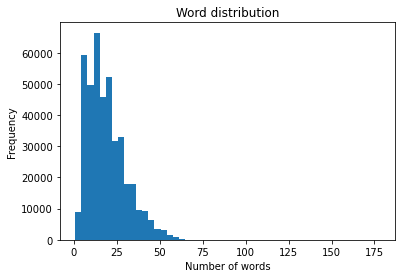

In [ ]:
# Word count distribution

word_distribution = df['text'].apply(lambda x: len(x.split()))
plt.hist(word_distribution, bins=50)
plt.title('Word distribution')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

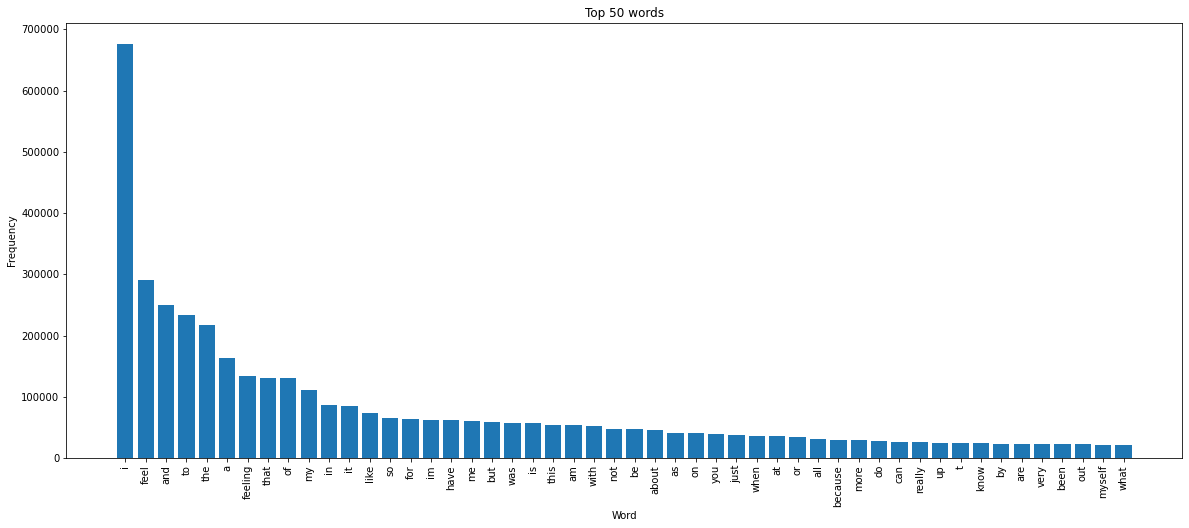

Number of unique words: 75302


In [ ]:
# Number of different words and their frequency

# Create a list of all the words
all_words = ' '.join(df['text']).split()

# Count the frequency of each word
word_freq = Counter(all_words)

# Create a dataframe
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])

# Sort the dataframe
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

# Plot the frequency of the top words
plt.figure(figsize=(20,8))
plt.bar(word_freq_df['word'][:50], word_freq_df['frequency'][:50])
plt.title('Top 50 words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


# Count the number of unique words
unique_words = len(set(all_words))
print(f'Number of unique words: {unique_words}')

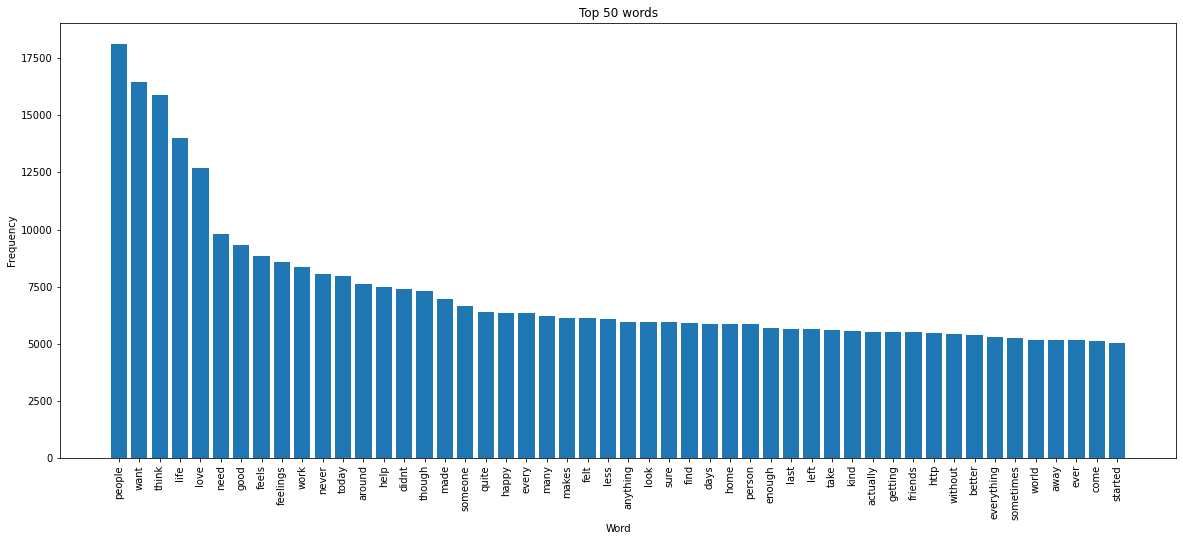

In [ ]:
from nltk.corpus import stopwords

all_words = ' '.join(df['text']).split()

# Remove non-alphabetic characters
all_words = [word for word in all_words if word.isalpha()]

# Remove stop words
all_words = [word for word in all_words if word not in stop_words]

# Remove words that are too short
all_words = [word for word in all_words if len(word) > 3]

# Remove words that are too frequent using word_freq_df
aux = set(word_freq_df['word'][:50].values)
all_words = [word for word in all_words if word not in aux]

# Remove useless words
useless = {
'time', 'little', 'would', 'still', 'even',
'dont', 'much', 'things', 'something', 'going', 'make', 'could',
'back', 'right', 'cant', 'well', 'pretty', 'also', 'always'}

all_words = [word for word in all_words if word not in useless]

# Count the frequency of each word
word_freq = Counter(all_words)

# Create a dataframe
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])

# Sort the dataframe
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

# Plot the frequency of the top words
plt.figure(figsize=(20,8))
plt.bar(word_freq_df['word'][:50], word_freq_df['frequency'][:50])
plt.title('Top 50 words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


emotions
anger       28441
fear        24539
joy         47342
love        24417
sadness     38615
surprise    14645
Name: text, dtype: int64


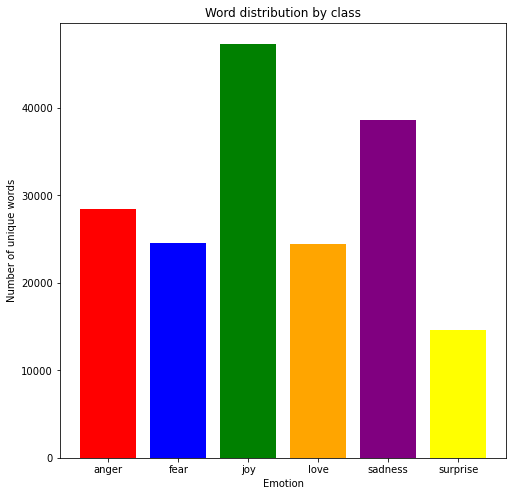

In [ ]:
# Word distribution by class
word_distribution_by_class = df.groupby('emotions')['text'].apply(lambda x: len(set(' '.join(x).split())))

print(word_distribution_by_class)
""" emotions
anger       28441
fear        24539
joy         47342
love        24417
sadness     38615
surprise    14645
Name: text, dtype: int64 """


# Word distribution by class
word_distribution_by_class = df.groupby('emotions')['text'].apply(lambda x: len(set(' '.join(x).split())))

# Define a color palette
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']

# Plot the word distribution by class
plt.figure(figsize=(8,8), facecolor='white')
plt.bar(word_distribution_by_class.index, word_distribution_by_class.values, color=colors)
plt.title('Word distribution by class')
plt.xlabel('Emotion')
plt.ylabel('Number of unique words')
plt.show()

In [ ]:
# Top 20 most common words by class

# Create a dictionary to store the top 10 words by class
top_words = {} 

import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Loop through each class
for emotion in df['emotions'].unique():
    # Create a list of all the words for that class
    all_words = ' '.join(df[df['emotions'] == emotion]['text']).split()
    
    # Remove non-alphabetic characters
    all_words = [word for word in all_words if word.isalpha()]
    
    # Remove stop words
    all_words = [word for word in all_words if word not in stop_words]
    
    # Remove words that are too short
    all_words = [word for word in all_words if len(word) > 3]
    
    # Remove words that are too frequent using word_freq_df
    aux = set(word_freq_df['word'][:50].values)
    all_words = [word for word in all_words if word not in aux]
    
    # Remove useless words
    useless = {
    'time', 'little', 'would', 'still', 'even',
    'dont', 'much', 'things', 'something', 'going', 'make', 'could',
    'back', 'right', 'cant', 'well', 'pretty', 'also', 'always'}
    
    all_words = [word for word in all_words if word not in useless]

    
    # Count the frequency of each word
    word_freq = Counter(all_words)
    
    # Sort the dictionary
    word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))
    
    # Store the top 10 words
    top_words[emotion] = list(word_freq.keys())[:20]
    
# Create a dataframe
top_words_df = pd.DataFrame(top_words)

# Print the dataframe
print(top_words_df)

     sadness       joy         love       anger           fear     surprise
0     people    people         love      people         people       amazed
1       want      want       people        want          think    impressed
2      think      love        loved       angry           want        weird
3       life      life       loving       think         scared      strange
4       love     think         want  frustrated         afraid  overwhelmed
5   feelings      good        sweet     annoyed        anxious    surprised
6      never     happy        liked        cold        nervous      amazing
7      alone      need       caring     selfish  uncomfortable      shocked
8       need      work  sympathetic    stressed       insecure        funny
9      didnt      sure      longing        life         unsure      curious
10     feels     today       gentle   irritated    overwhelmed        dazed
11      made     feels        think        rude          weird       people
12      help

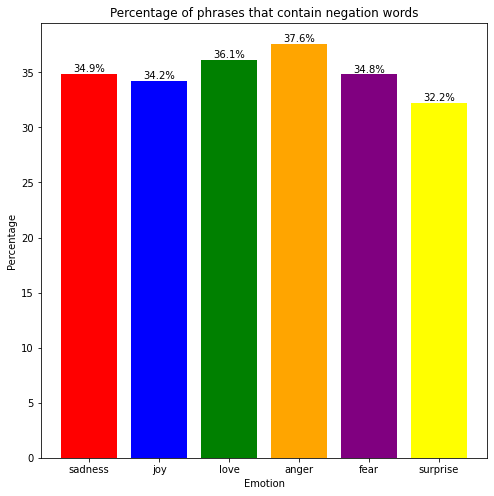

In [ ]:
# Check percentage of phrases per class that contain negation words

# Define a list of negation words
negation_words = {'no', 'not', 'never', 'none', 'nobody', 'nowhere', 'nothing', 'noone', 'rather', 'hardly', 'scarcely', 'rarely', 'seldom', 'neither', 'nor', 'cannot', 'dont' 'wont', 'cant', 'isnt', 'arent', 'wasnt', 'werent', 'shouldnt', 'wouldnt', 'couldnt', 'wont', 'didnt', 'cant', 'couldnt', 'mustnt'}

# Create a list to store the percentage of phrases that contain negation words
negation_percentage = []

# Loop through each class
for emotion in df['emotions'].unique():
    # Create a list of all the phrases for that class
    all_phrases = df[df['emotions'] == emotion]['text']
    
    # Count the number of phrases that contain negation words
    phrases_with_negation = all_phrases.apply(lambda x: any(word in x for word in negation_words)).sum()
    
    # Calculate the percentage of phrases that contain negation words
    percentage = phrases_with_negation / len(all_phrases) * 100
    
    # Store the percentage
    negation_percentage.append(percentage)
    
# Create a dataframe
negation_percentage_df = pd.DataFrame(negation_percentage, index=df['emotions'].unique(), columns=['percentage'])

# Plot the percentage of phrases that contain negation words
plt.figure(figsize=(8,8), facecolor='white')
plt.bar(negation_percentage_df.index, negation_percentage_df['percentage'], color=colors)
plt.title('Percentage of phrases that contain negation words')
plt.xlabel('Emotion')
plt.ylabel('Percentage')

# Add value annotations to the bars
for i, percentage in enumerate(negation_percentage_df['percentage']):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

In [ ]:
def findWordPercentage(word):
    # Percentage of phrases that contain "love" per class

    # Create a list to store the percentage of phrases that contain the word "love"
    word_perc = []

    # Loop through each class
    for emotion in df['emotions'].unique():
        # Create a list of all the phrases for that class
        all_phrases = df[df['emotions'] == emotion]['text']
        
        # Count the number of phrases that contain the word
        phrases_with_love = all_phrases.apply(lambda x: word in x).sum()
        
        # Calculate the percentage of phrases that contain the word
        percentage = phrases_with_love / len(all_phrases) * 100
        
        # Store the percentage
        word_perc.append(percentage)
        
    # Create a dataframe
    love_percentage_df = pd.DataFrame(word_perc, index=df['emotions'].unique(), columns=['percentage'])

    # Plot the percentage of phrases that contain the word "love"
    plt.figure(figsize=(8,8), facecolor='white')
    plt.bar(love_percentage_df.index, love_percentage_df['percentage'], color=colors)
    plt.title(f'Percentage of phrases that contain the word "{word}"')
    plt.xlabel('Emotion')
    plt.ylabel('Percentage')

    # Add value annotations to the bars
    for i, percentage in enumerate(love_percentage_df['percentage']):
        plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')
        
    plt.show()
    
    print("The word " + word + " is present a total of " + str(round(sum(word_perc),1)) + "% of the time in the dataset")

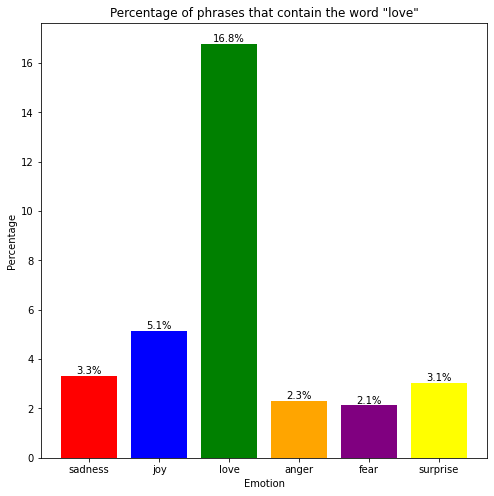

The word love is present a total of 32.7% of the time in the dataset


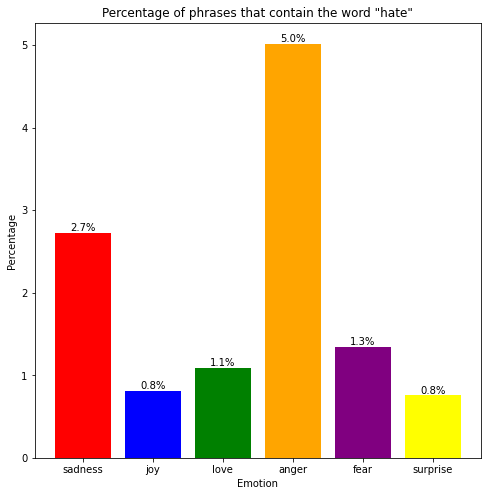

The word hate is present a total of 11.7% of the time in the dataset


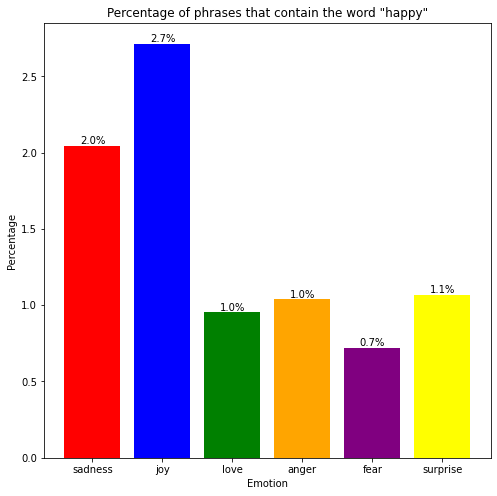

The word happy is present a total of 8.5% of the time in the dataset


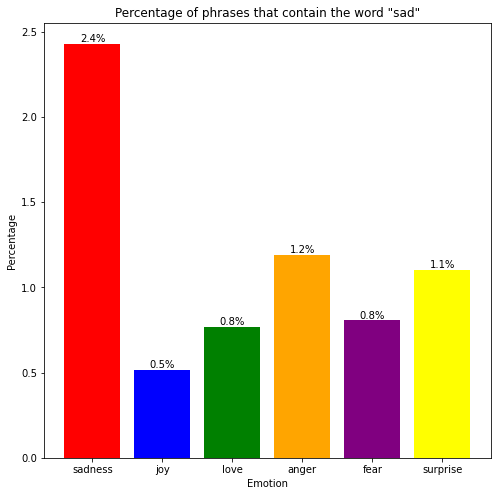

The word sad is present a total of 6.8% of the time in the dataset


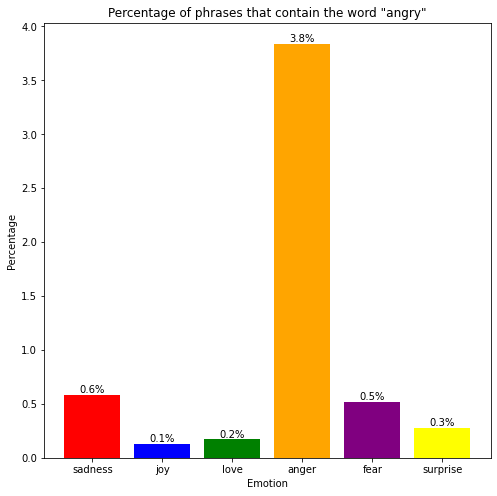

The word angry is present a total of 5.5% of the time in the dataset


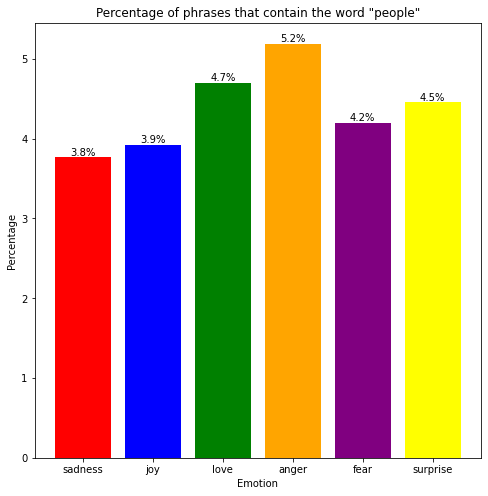

The word people is present a total of 26.2% of the time in the dataset


In [ ]:
findWordPercentage('love')
findWordPercentage('hate')
findWordPercentage('happy')
findWordPercentage('sad')
findWordPercentage('angry')
findWordPercentage('people')